### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page.
Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 


### Goal
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Please Note: 
* # install ipywidgets and enable widgets in jupyterlab and notebook if not installed.

#### install jupyterlab_manager as per your version if error occurs(check the version in the error)

In [1]:
# importing for ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#import to filter warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import xticks
%matplotlib inline
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [2]:
#function for missing values in columns
def missing_coldata(df):
    missin_col = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,1), columns=['% of missing value'])
    missin_col['Count of Missing Values'] = df.isnull().sum()
    return missin_col
#function for missing values in rows
def missing_rowdata(df):
    missin_row = pd.DataFrame(round(df.isnull().sum(axis=1).sort_values(ascending=False)/len(df.columns)*100), columns=['% of missing value'])
    missin_row['Count of Missing Values'] = df.isnull().sum(axis=1)
    return missin_row

# Importing the data

In [3]:
leadsdata = pd.read_csv('Leads.csv')
leadsdata.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leadsdata.shape

(9240, 37)

In [5]:
leadsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leadsdata.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

#### Creating a dataframe for duplicate values if any

In [7]:
dupcheck=leadsdata[leadsdata.duplicated(["Prospect ID"])]
dupcheck

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
sum(leadsdata.duplicated('Prospect ID')) == 0

True

In [9]:
sum(leadsdata.duplicated('Lead Number')) == 0

True

In [10]:
leadsdata.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                      5   
Lead Source                                      21  
Do Not Email                                     2   
Do Not Call                                      2   
Converted                                        2   
TotalVisits                                      41  
Total Time Spent on Website                      1731
Page Views Per Visit                             114 
Last Activity                                    17  
Country                                          38  
Specialization                                   19  
How did you hear about X Education               10  
What is your current occupation                  6   
What matters most to you in choosing a course    3   
Search                                           2   
Magazine                                         1   
Newspaper Article           

#### Those features which have only one unique value are :
* #### *-Magazine*
* #### *-Recieve More updates about the course*
* #### *-Update me on Supply chain content*
* #### *-Get updates on DM content*
* #### *-I agree to pay the amount through cheque*
These features show no variance and thus all the leads have chosen one option, 
thus this feature doesnt make any impact or difference on conversion of leads.


### Conversion rate

In [11]:
Conversion_rate = (sum(leadsdata['Converted'])/len(leadsdata['Converted'].index))*100
print("The conversion rate of leads is: ",Conversion_rate)

The conversion rate of leads is:  38.53896103896104


##### It can easily be considered to remove these features from the model as they play no role in conversion of leads

## Data Visualization and Cleaning


#### Divide the data into Numeric and categorical data  

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# NUMERIC
numdata=leadsdata[list(leadsdata.select_dtypes(numerics).columns)]
# CATEGORICAL 
catdata=leadsdata[list(leadsdata.select_dtypes(exclude=numerics).columns)]
catdata.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Conversion rate for each categorical feature

In [13]:
@interact
def counts(col =catdata.iloc[:,1:].columns):
    sns.countplot(x=col,data=leadsdata,hue="Converted",palette="husl",hue_order=[0,1])
    plt.xlabel(col)
    plt.ylabel('Total count')
    plt.legend(loc='upper center', bbox_to_anchor=(1, 0.8), ncol=1)
    plt.xticks(rotation=65, horizontalalignment='right',fontweight='light')
    convertcount=leadsdata.pivot_table(values='Lead Number',index=col,columns='Converted', aggfunc='count').fillna(0)
    convertcount["Conversion(%)"] =round(convertcount[1]/(convertcount[0]+convertcount[1]),2)*100
    return print(convertcount.sort_values(ascending=False,by=1),plt.show())

interactive(children=(Dropdown(description='col', options=('Lead Origin', 'Lead Source', 'Do Not Email', 'Do N…

### Desciribing the data

In [14]:
@interact
def described(col=leadsdata.iloc[:,2:].columns):
    return leadsdata[col].describe()

interactive(children=(Dropdown(description='col', options=('Lead Origin', 'Lead Source', 'Do Not Email', 'Do N…

In [15]:
#Choosing to drop the columns that have only 1 unique value
leadsdata=leadsdata.drop(["Receive More Updates About Our Courses","Magazine","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

### Handling Missing Data

##### Newspaper : 
##### X Education Forums : 
##### Newspaper Articles : 
##### Through Recommendations : 
##### Digital Advertisements : 
for all these variables above mentioned , all the values are no hence it does not have any significant role in lead score, drop this column
 
##### What matters most to you in choosing a course : 
99.9% of available values are "Better career prospects" and around 30 % are missing, hence it does not have any significant role in lead score, drop this column

##### Search :
99% values are no except a few yes and missing, hence it does not have any significant role in lead score, drop this column
##### Do Not Call
All the values are no except 2 values, hence there is no variance, doesnt indicate anything about leads and can easily be dropped



In [16]:
leadsdata=leadsdata.drop(["Newspaper","X Education Forums","Newspaper Article",
                          "Through Recommendations","Digital Advertisement",
                          "What matters most to you in choosing a course","Search","Do Not Call"],axis=1)

In [17]:
missing_coldata(leadsdata)

,% of missing value,Count of Missing Values
Lead Quality,51.6,4767
Asymmetrique Profile Score,45.6,4218
Asymmetrique Activity Score,45.6,4218
Asymmetrique Profile Index,45.6,4218
Asymmetrique Activity Index,45.6,4218
Tags,36.3,3353
Lead Profile,29.3,2709
What is your current occupation,29.1,2690
Country,26.6,2461
How did you hear about X Education,23.9,2207


#### Lead Source : 
Missing values are much less than 1 percent, imputing it with most frequent value "Google"

In [18]:
leadsdata["Lead Source"]=leadsdata["Lead Source"].fillna("Google")

#### What is your current occupation

In [19]:
leadsdata["What is your current occupation"]=leadsdata["What is your current occupation"].fillna("Unemployed")

#### Specialization
The highest frequency is of Select, which means we can not drop it and need to convert it to "Any Other"/ "Not on List"
Also if manually entering the specialization is not provided on website then this should be taken care of in the form design.


#*Also the missing values can be imputed with Any_Other

In [20]:
leadsdata["Specialization"]=leadsdata["Specialization"].replace("Select","Any_Other")
leadsdata["Specialization"]=leadsdata["Specialization"].fillna("Any_Other")

#### How did you hear about X Education
The highest frequency is of Select, which means we can not drop it and need to convert it to "Any Other"/ "Not Mentioned"
As this is an important factor in order to plan the marketing of X Education, hence more information should be gathered about it through other tools.


#*Also the missing values can be imputed with Any_Other

In [21]:
leadsdata["How did you hear about X Education"]=leadsdata["How did you hear about X Education"].replace("Select","Not_Mentioned")
leadsdata["How did you hear about X Education"]=leadsdata["How did you hear about X Education"].fillna("Not_Mentioned")

#### Lead Profile
The highest frequency is of Select, which means we can not drop it and need to convert it to "Any Other"/ "Not Mentioned"


#*Also the missing values can be imputed with Any_Other

In [22]:
leadsdata["Lead Profile"]=leadsdata["Lead Profile"].replace("Select","Any_Other")
leadsdata["Lead Profile"]=leadsdata["Lead Profile"].fillna("Any_other")

#### Lead Quality
The highest frequency is of Select, which means we can not drop it and need to convert it to "Any Other"/ "Not Mentioned"


#*Also the missing values can be imputed with Any_Other

In [23]:
leadsdata["Lead Quality"]=leadsdata["Lead Quality"].replace("Select","Might be")
leadsdata["Lead Quality"]=leadsdata["Lead Quality"].fillna("Might be")

#### Tags

In [24]:
leadsdata["Tags"]=leadsdata["Tags"].fillna("Will revert after reading the email")

#### Country
95% of the data has country as India hence imputing with India

In [25]:
leadsdata["Country"]=leadsdata["Country"].fillna("India")

#### City
majority records have city as Mumbai or nearby, hence imputing the NaN with Mumbai is not inappropriate choice

In [26]:
leadsdata["City"]=leadsdata["City"].fillna("Mumbai")

In [27]:
dd=pd.read_excel("Leads Data Dictionary.xlsx")
dd.iloc[:,1:]

,Unnamed: 1,Unnamed: 2
0,Variables,Description
1,Prospect ID,A unique ID with which the customer is identified.
2,Lead Number,A lead number assigned to each lead procured.
3,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
4,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
5,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
6,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
7,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
8,TotalVisits,The total number of visits made by the customer on the website.
9,Total Time Spent on Website,The total time spent by the customer on the website.


#### Lets see the shape of dataframe now

In [28]:
leadsdata.shape

(9240, 24)

In [29]:
missing_coldata(leadsdata)

,% of missing value,Count of Missing Values
Asymmetrique Profile Score,45.6,4218
Asymmetrique Activity Score,45.6,4218
Asymmetrique Profile Index,45.6,4218
Asymmetrique Activity Index,45.6,4218
TotalVisits,1.5,137
Page Views Per Visit,1.5,137
Last Activity,1.1,103
Last Notable Activity,0.0,0
Lead Number,0.0,0
Lead Origin,0.0,0


### Outliers Check of numeric data


In [30]:
numdata.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [31]:
@interact
def density( y=numdata.iloc[:,2:].columns,tick_spacing = [100,50,25,10,5]):
    ax=leadsdata[y].plot(kind="hist",title=y,bins=50, rot=30)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    return

interactive(children=(Dropdown(description='y', options=('TotalVisits', 'Total Time Spent on Website', 'Page V…

In [32]:
@interact
def outliers_check( y=numdata.iloc[:,2:].columns):
    return leadsdata.plot(kind='box',y=y,figsize=[6,5]) 

interactive(children=(Dropdown(description='y', options=('TotalVisits', 'Total Time Spent on Website', 'Page V…

#### 'Lead Number','Asymmetrique Activity Score', 'Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index' 
45% missing values should not be imputed because this may effect the data's correctness, hence dropping these features.

In [33]:
leadsdata.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1,inplace=True)

In [34]:
missing_coldata(leadsdata)

,% of missing value,Count of Missing Values
TotalVisits,1.5,137
Page Views Per Visit,1.5,137
Last Activity,1.1,103
A free copy of Mastering The Interview,0.0,0
Lead Number,0.0,0
Lead Origin,0.0,0
Lead Source,0.0,0
Do Not Email,0.0,0
Converted,0.0,0
Total Time Spent on Website,0.0,0


#### TotalVisits, Page views per visit, Last Activity  : 
Missing values are approx. 1 percent
hence drop all these rows

In [35]:
leadsdata.dropna(inplace = True)

In [36]:
missing_coldata(leadsdata)

,% of missing value,Count of Missing Values
Last Notable Activity,0.0,0
A free copy of Mastering The Interview,0.0,0
Lead Number,0.0,0
Lead Origin,0.0,0
Lead Source,0.0,0
Do Not Email,0.0,0
Converted,0.0,0
TotalVisits,0.0,0
Total Time Spent on Website,0.0,0
Page Views Per Visit,0.0,0


In [37]:
leadsdata.shape

(9103, 20)

##### Analyzing the categories, we can reduce them as per the number of leads, the categories which have least number of records, almost negligible can be combined to form one category like Miscellaneous

#### Tags

In [38]:
leadsdata['Tags'] = leadsdata['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Misc_Tags')

In [39]:
leadsdata['Tags'] = leadsdata['Tags'].replace(["Ringing","Misc_Tags","Interested in other courses","switched off","Already a student",
                                               "Interested  in full time MBA","Not doing further education","invalid number","wrong number given"], 'Misc_Tags')                                  


#### Last Notable Activity

In [40]:
leadsdata["Last Notable Activity"] = leadsdata["Last Notable Activity"].replace(['Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 'Misc_Notable_Activity')

#### Lead Source
As we can see that There are various lead source which have just 1 or 2 leads, thus combining all those to one category Miscellaneous


In [41]:
leadsdata['Lead Source'] = leadsdata['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Miscellaneous')

In [42]:
#There are two google in lead source which should be corrected to one
leadsdata['Lead Source'] = leadsdata['Lead Source'].replace('google',"Google")


#### Last Activity


In [43]:
# As we can see that There are various categories in Last Activity which have very few records, thus combining all those to one category Miscellaneous
leadsdata['Last Activity'] = leadsdata['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Miscellaneous')

#### Total Visits

In [44]:
(leadsdata["TotalVisits"]>=30).sum()

11

In [45]:
# removed outliers with values greater than 30

leadsdata=leadsdata[leadsdata["TotalVisits"] < 30]

#### Page Views Per Visit 

In [46]:
# can easily remove these two outliers
(leadsdata["Page Views Per Visit"]>=15).sum()

8

In [47]:
#### removed outliers with values greater than 15
leadsdata=leadsdata[leadsdata["Page Views Per Visit"]<15]

#### Total Time Spent on Website

##### As we can see the time spent is in minutes: we analyse it by dividing the data into two parts:- 
* #####  more than one hour spent 


In [48]:
# dataframe is sliced for more than one hour time spent on website
leads1hrplus=leadsdata[leadsdata['Total Time Spent on Website']>=60]
leads1hrplus["hours spent"]=round(leads1hrplus["Total Time Spent on Website"]/60).astype(int)

In [49]:
time_spent_abv1hr=leads1hrplus.pivot_table(values='Lead Number',index=['hours spent'],columns='Converted', aggfunc='count').fillna(0)
time_spent_abv1hr["Conversion(%)"] =round(time_spent_abv1hr[1]/(time_spent_abv1hr[0]+time_spent_abv1hr[1]),2)*100
time_spent_abv1hr.sort_values(ascending=False,by=1)

Converted,0,1,Conversion(%)
hours spent,,,
22,57.0,138.0,71.0
19,52.0,131.0,72.0
17,43.0,129.0,75.0
18,63.0,126.0,67.0
21,61.0,124.0,67.0
16,54.0,124.0,70.0
20,58.0,120.0,67.0
25,32.0,114.0,78.0
23,55.0,106.0,66.0


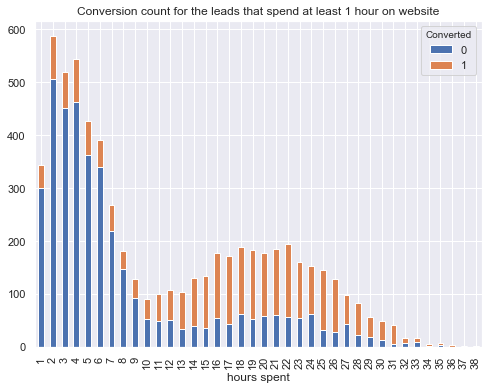

In [50]:
time_spent_abv1hr.iloc[:,:-1].plot(kind='bar',title= "Conversion count for the leads that spend at least 1 hour on website",stacked=True,figsize=[8,6])

##### Time spent on website
* #####  less than one hour.

In [51]:
leadslessthan1hr=leadsdata[leadsdata['Total Time Spent on Website']<60]
leadslessthan1hr["mins_spent"]=leadslessthan1hr["Total Time Spent on Website"].astype(int)

In [52]:
time_spent_upto1hr=leadslessthan1hr.pivot_table(values='Lead Number',index=['mins_spent'],columns='Converted', aggfunc='count').fillna(0)
time_spent_upto1hr["Conversion(%)"] =round(time_spent_upto1hr[1]/(time_spent_upto1hr[0]+time_spent_upto1hr[1]),2)*100
time_spent_upto1hr.sort_values(ascending=False,by="Conversion(%)")

Converted,0,1,Conversion(%)
mins_spent,,,
1,4.0,3.0,43.0
0,1277.0,916.0,42.0
17,3.0,2.0,40.0
39,5.0,3.0,38.0
25,6.0,3.0,33.0
16,9.0,4.0,31.0
47,7.0,3.0,30.0
26,6.0,2.0,25.0
31,10.0,3.0,23.0


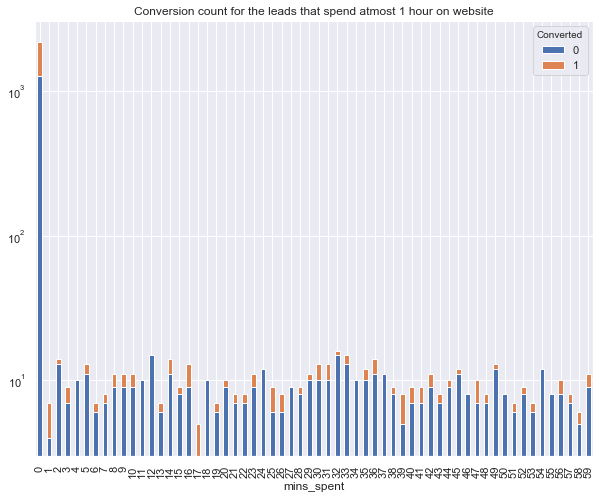

In [53]:
time_spent_upto1hr.iloc[:,:-1].plot(kind='bar',title="Conversion count for the leads that spend atmost 1 hour on website",stacked=True,figsize=[10,8],log=True)

* ### Conversion rate for other numeric features of the leads 

In [54]:
@interact
def numcount(cols=['TotalVisits','Asymmetrique Activity Score', 'Asymmetrique Profile Score']):
    numdfcount=round(leadsdata.pivot_table(values='Lead Number',index=cols,columns='Converted', aggfunc='count')).fillna(0)
    numdfcount["Conversion(%)"]=round((numdfcount[1]/(numdfcount[0]+numdfcount[1]))*100)
    cnplot=numdfcount.iloc[:,:-1].plot(kind="bar",stacked=True, legend="upper right", title=cols,figsize=[8,6])
    return print(numdfcount, "\n", cnplot)

interactive(children=(Dropdown(description='cols', options=('TotalVisits', 'Asymmetrique Activity Score', 'Asy…

In [55]:
pageview=leadsdata.pivot_table(values='Lead Number',index=['Page Views Per Visit'],columns='Converted', aggfunc='count')
pageview.reset_index(inplace=True)

In [56]:
pageview.fillna(0,inplace=True)

In [57]:
pageviews=pageview.round().groupby("Page Views Per Visit").sum()
pageviews["Conversion(%)"]=round((pageviews[1]/(pageviews[0]+pageviews[1]))*100)

Converted,0,1,Conversion(%)
Page Views Per Visit,,,
0.0,1273.0,916.0,42.0
1.0,543.0,231.0,30.0
2.0,1665.0,917.0,36.0
3.0,811.0,518.0,39.0
4.0,635.0,434.0,41.0
5.0,314.0,212.0,40.0
6.0,181.0,101.0,36.0
7.0,85.0,49.0,37.0
8.0,57.0,33.0,37.0


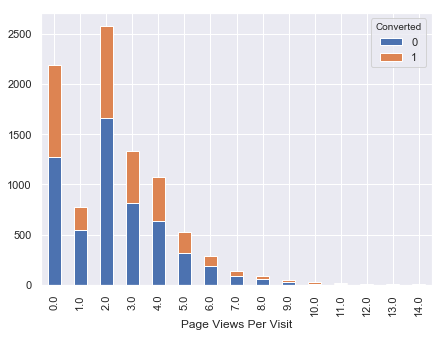

In [58]:
pageviews.iloc[:,:-1].plot(kind="bar",legend="upper right",stacked=True,figsize=[7,5])
pageviews

In [59]:
# there are two unique keys for the data, hence dropping Prospect ID for now n keeping Lead Number.
leadsdata=leadsdata.drop("Prospect ID",axis=1)

In [60]:
leadsdata.nunique()

Lead Number                               9084
Lead Origin                               4   
Lead Source                               9   
Do Not Email                              2   
Converted                                 2   
TotalVisits                               30  
Total Time Spent on Website               1715
Page Views Per Visit                      104 
Last Activity                             11  
Country                                   38  
Specialization                            19  
How did you hear about X Education        10  
What is your current occupation           6   
Tags                                      5   
Lead Quality                              5   
Lead Profile                              7   
City                                      7   
A free copy of Mastering The Interview    2   
Last Notable Activity                     11  
dtype: int64

In [61]:
leadsdata.drop(['Country'],axis=1,inplace=True)

In [62]:
leadsdata.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### After cleaning the data we can visualise it again to see the conversion rates among various categories

In [63]:
catdata=leadsdata[list(leadsdata.select_dtypes(exclude=numerics).columns)]
catdata.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [64]:
@interact
def counts(col =catdata.columns):
    sns.countplot(x=col,data=leadsdata,hue="Converted",palette="husl",hue_order=[0,1])
    plt.xlabel(col)
    plt.ylabel('Total count')
    plt.legend(loc='upper center', bbox_to_anchor=(1, 0.8), ncol=1)
    plt.xticks(rotation=65, horizontalalignment='right',fontweight='light')
    convertcount=leadsdata.pivot_table(values='Lead Number',index=col,columns='Converted', aggfunc='count').fillna(0)
    convertcount["Conversion(%)"] =round(convertcount[1]/(convertcount[0]+convertcount[1]),2)*100
    return print(convertcount.sort_values(ascending=False,by=1),plt.show())

interactive(children=(Dropdown(description='col', options=('Lead Origin', 'Lead Source', 'Do Not Email', 'Last…

## DATA PREPARATION

#### Encoding categorical features 

In [65]:
catdata.nunique()

Lead Origin                               4 
Lead Source                               9 
Do Not Email                              2 
Last Activity                             11
Specialization                            19
How did you hear about X Education        10
What is your current occupation           6 
Tags                                      5 
Lead Quality                              5 
Lead Profile                              7 
City                                      7 
A free copy of Mastering The Interview    2 
Last Notable Activity                     11
dtype: int64

In [66]:
df = pd.get_dummies(leadsdata[catdata.columns], drop_first=True)
df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Miscellaneous,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Misc_Notable_Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
#Create a copy of leads data to add these dummies to the whole data
leads_copy = leadsdata.copy(deep=True)

In [68]:
leads = leadsdata.drop(catdata.columns, axis = 1)

In [69]:
leads.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [70]:
leads = pd.concat([leads, df], axis=1)

In [71]:
leads.shape

(9084, 90)

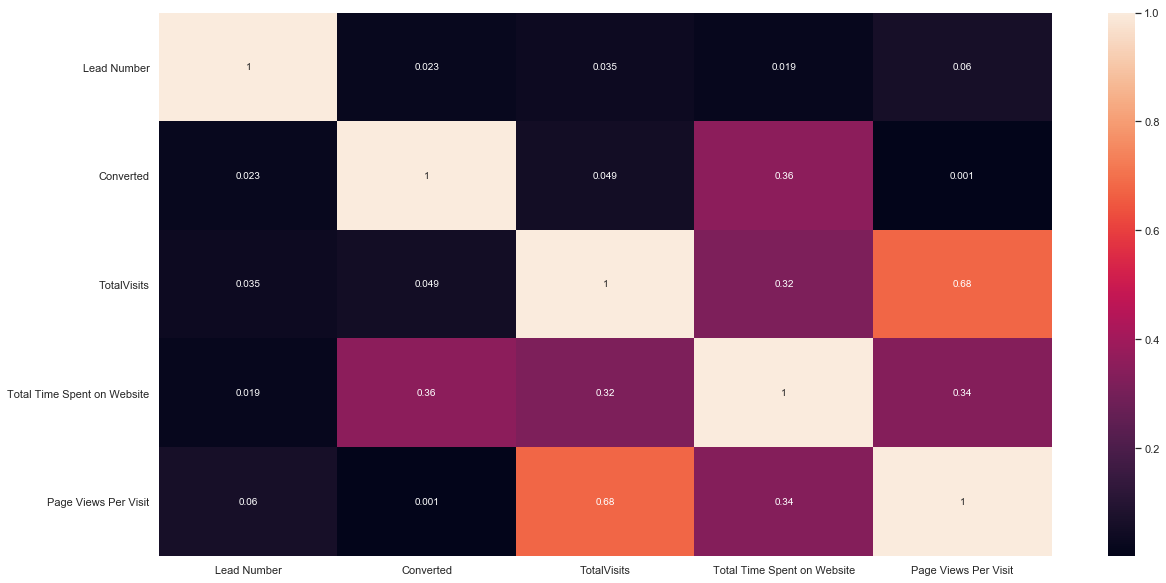

In [72]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(leadsdata.corr(),annot = True)

In [73]:
# Total Visits and Page Views Per Visit are significantly correlated, hence we drop one of those
leads = leads.drop("Page Views Per Visit", axis = 1)

In [74]:
leads.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Miscellaneous', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Miscellaneous', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-CO

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
leads[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(leads[['TotalVisits','Total Time Spent on Website']])
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Misc_Notable_Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,0.172414,0.296655,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,1,0.068966,0.674296,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,660719,0,0.034483,0.134243,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,1,0.068966,0.628521,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Splitting the data

In [76]:
from sklearn.model_selection import train_test_split
# Creating target variable as y and remaining as X
X = leads.drop(["Lead Number",'Converted'], axis=1)
y = leads['Converted']
display(y.head(),X.head())

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Miscellaneous,Last Activity_Olark Chat Conversation,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Misc_Notable_Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.172414,0.296655,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.068966,0.674296,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0.034483,0.134243,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.068966,0.628521,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
numdata=X_train[list(X_train.select_dtypes(numerics).columns)]
numdata.columns

Index(['TotalVisits', 'Total Time Spent on Website'], dtype='object')

### Feature Standardisation

### DATA MODELLING

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 24)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 64),
 ('Lead Source_Miscellaneous', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 36),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Miscellaneous', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Page Visited on Website', False, 63),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 27),
 ('Last Ac

In [80]:
vars=X_train.columns[rfe.support_]

In [81]:
import statsmodels.api as sm

In [82]:
X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1082.8
Date:                Mon, 26 Aug 2019   Deviance:                       2165.6
Time:                        19:55:08   Pearson chi2:                 1.60e+04
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8912      0.503     -1.772      0.076      -1.877       0.094
TotalVisits                                       1.3004      0.572      2.275      0.023       0.180       2.421
Total Time Spent on Website                       4.2826      0.272     15.763      0.000       3.750       4.815
Lead Origin_Lead Add Form                         2.0527      0.424      4.840      0.000       1.222       2.884
Lead Source_Olark Chat                            0.9553      0.178      5.372      0.000       0.607       1.304
Lead Source_Welingak Website                      1.0719      0.834      1.286      0.198      -0.562       2.706
Do Not Email_Yes                                 -1.3090      0.267     -4.901      0.000      -1.832      -0.786
Last Activity_Miscellaneous                       1.7762      0.870      2.041      0.041       0.070       3.482
Last Activity_SMS Sent                            1.5189      0.242      6.289      0.000       1.046       1.992
Specialization_Travel and Tourism                -0.8607      0.447     -1.925      0.054      -1.737       0.016
How did you hear about X Education_SMS          -20.3220   1.18e+04     -0.002      0.999   -2.32e+04    2.32e+04
What is your current occupation_Unemployed       -0.7188      0.285     -2.523      0.012      -1.277      -0.160
Tags_Closed by Horizzon                           5.5406      0.803      6.896      0.000       3.966       7.115
Tags_Lost to EINS                                 8.4219      0.842     10.008      0.000       6.773      10.071
Tags_Misc_Tags                                   -3.2736      0.291    -11.246      0.000      -3.844      -2.703
Tags_Will revert after reading the email          2.8668      0.314      9.116      0.000       2.250       3.483
Lead Quality_Might be                            -1.4341      0.300     -4.774      0.000      -2.023      -0.845
Lead Quality_Not Sure                            -1.0895      0.342     -3.186      0.001      -1.760      -0.419
Lead Quality_Worst                               -2.4232      0.780     -3.105      0.002      -3.953      -0.894
Lead Profile_Any_other                           -3.2932      0.145    -22.789      0.000      -3.576      -3.010
Lead Profile_Other Leads                          1.5065      0.334      4.516      0.000       0.853       2.160
Lead Profile_Potential Lead                       1.1626      0.228      5.089      0.000       0.715       1.610
Last Notable Activity_Modified                   -1.1332      0.163     -6.946      0.000      -1.453      -0.813
Last Notable Activity_Olark Chat Conversation    -2.0139      0.501     -4.020      0.000      -2.996      -1.032
Last Notable Activity_SMS Sent                    0.7710      0.279      2.768      

#### Vif

In [83]:
X_train_sm = X_train_sm.drop(['const'], axis=1)
# Checking the  VIF of all the  features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Tags_Will revert after reading the email,13.39
10,What is your current occupation_Unemployed,9.98
15,Lead Quality_Might be,9.18
13,Tags_Misc_Tags,8.13
23,Last Notable Activity_SMS Sent,6.57
7,Last Activity_SMS Sent,6.18
18,Lead Profile_Any_other,3.04
0,TotalVisits,2.77
1,Total Time Spent on Website,2.56
16,Lead Quality_Not Sure,2.43


In [84]:
vars=vars.drop(['How did you hear about X Education_SMS'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.3
Date:                Mon, 26 Aug 2019   Deviance:                       2168.6
Time:                        19:55:09   Pearson chi2:                 1.61e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8945      0.503     -1.779      0.075      -1.880       0.091
TotalVisits                                       1.3135      0.572      2.297      0.022       0.193       2.434
Total Time Spent on Website                       4.2926      0.272     15.809      0.000       3.760       4.825
Lead Origin_Lead Add Form                         2.0590      0.424      4.854      0.000       1.228       2.890
Lead Source_Olark Chat                            0.9663      0.178      5.434      0.000       0.618       1.315
Lead Source_Welingak Website                      1.0711      0.834      1.285      0.199      -0.563       2.705
Do Not Email_Yes                                 -1.3059      0.267     -4.886      0.000      -1.830      -0.782
Last Activity_Miscellaneous                       1.7809      0.871      2.044      0.041       0.073       3.489
Last Activity_SMS Sent                            1.5244      0.242      6.312      0.000       1.051       1.998
Specialization_Travel and Tourism                -0.8555      0.447     -1.912      0.056      -1.732       0.021
What is your current occupation_Unemployed       -0.7203      0.285     -2.528      0.011      -1.279      -0.162
Tags_Closed by Horizzon                           5.5405      0.804      6.895      0.000       3.966       7.116
Tags_Lost to EINS                                 8.4292      0.842     10.017      0.000       6.780      10.079
Tags_Misc_Tags                                   -3.2743      0.291    -11.248      0.000      -3.845      -2.704
Tags_Will revert after reading the email          2.8649      0.314      9.111      0.000       2.249       3.481
Lead Quality_Might be                            -1.4335      0.300     -4.772      0.000      -2.022      -0.845
Lead Quality_Not Sure                            -1.0868      0.342     -3.179      0.001      -1.757      -0.417
Lead Quality_Worst                               -2.4282      0.780     -3.112      0.002      -3.957      -0.899
Lead Profile_Any_other                           -3.3027      0.144    -22.856      0.000      -3.586      -3.020
Lead Profile_Other Leads                          1.5043      0.334      4.511      0.000       0.851       2.158
Lead Profile_Potential Lead                       1.1634      0.228      5.092      0.000       0.716       1.611
Last Notable Activity_Modified                   -1.1352      0.163     -6.960      0.000      -1.455      -0.816
Last Notable Activity_Olark Chat Conversation    -2.0155      0.501     -4.020      0.000      -2.998      -1.033
Last Notable Activity_SMS Sent                    0.7605      0.278      2.733      0.006       0.215       1.306
====================================================================================

In [85]:
vars=vars.drop(['Specialization_Travel and Tourism'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.1
Date:                Mon, 26 Aug 2019   Deviance:                       2172.2
Time:                        19:55:09   Pearson chi2:                 1.61e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8831      0.502     -1.759      0.079      -1.867       0.101
TotalVisits                                       1.2544      0.570      2.199      0.028       0.136       2.372
Total Time Spent on Website                       4.2962      0.271     15.825      0.000       3.764       4.828
Lead Origin_Lead Add Form                         2.0785      0.423      4.919      0.000       1.250       2.907
Lead Source_Olark Chat                            0.9785      0.178      5.510      0.000       0.630       1.327
Lead Source_Welingak Website                      1.0691      0.833      1.284      0.199      -0.563       2.702
Do Not Email_Yes                                 -1.3246      0.267     -4.967      0.000      -1.847      -0.802
Last Activity_Miscellaneous                       1.8014      0.872      2.066      0.039       0.092       3.510
Last Activity_SMS Sent                            1.5293      0.241      6.349      0.000       1.057       2.001
What is your current occupation_Unemployed       -0.7217      0.285     -2.534      0.011      -1.280      -0.163
Tags_Closed by Horizzon                           5.5349      0.804      6.882      0.000       3.959       7.111
Tags_Lost to EINS                                 8.4313      0.842     10.013      0.000       6.781      10.082
Tags_Misc_Tags                                   -3.2708      0.291    -11.228      0.000      -3.842      -2.700
Tags_Will revert after reading the email          2.8449      0.315      9.036      0.000       2.228       3.462
Lead Quality_Might be                            -1.4313      0.300     -4.768      0.000      -2.020      -0.843
Lead Quality_Not Sure                            -1.0825      0.342     -3.168      0.002      -1.752      -0.413
Lead Quality_Worst                               -2.4313      0.779     -3.120      0.002      -3.959      -0.904
Lead Profile_Any_other                           -3.2974      0.144    -22.853      0.000      -3.580      -3.015
Lead Profile_Other Leads                          1.4884      0.333      4.463      0.000       0.835       2.142
Lead Profile_Potential Lead                       1.1437      0.228      5.018      0.000       0.697       1.591
Last Notable Activity_Modified                   -1.1491      0.163     -7.053      0.000      -1.468      -0.830
Last Notable Activity_Olark Chat Conversation    -2.0063      0.500     -4.009      0.000      -2.987      -1.025
Last Notable Activity_SMS Sent                    0.7406      0.277      2.671      0.008       0.197       1.284
=================================================================================================================
"""

In [86]:
X_train_sm = X_train_sm.drop(['const'], axis=1)
# Checking the  VIF of all the  features

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,13.39
8,What is your current occupation_Unemployed,9.98
13,Lead Quality_Might be,9.18
11,Tags_Misc_Tags,8.13
21,Last Notable Activity_SMS Sent,6.57
7,Last Activity_SMS Sent,6.18
16,Lead Profile_Any_other,3.04
0,TotalVisits,2.76
1,Total Time Spent on Website,2.56
14,Lead Quality_Not Sure,2.43


In [87]:

vars=vars.drop(['Last Activity_Miscellaneous'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1088.3
Date:                Mon, 26 Aug 2019   Deviance:                       2176.5
Time:                        19:55:10   Pearson chi2:                 1.61e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8645      0.501     -1.725      0.085      -1.847       0.118
TotalVisits                                       1.3217      0.569      2.324      0.020       0.207       2.436
Total Time Spent on Website                       4.2918      0.271     15.832      0.000       3.760       4.823
Lead Origin_Lead Add Form                         2.0874      0.421      4.954      0.000       1.262       2.913
Lead Source_Olark Chat                            0.9789      0.178      5.514      0.000       0.631       1.327
Lead Source_Welingak Website                      1.0593      0.832      1.273      0.203      -0.572       2.691
Do Not Email_Yes                                 -1.3225      0.266     -4.977      0.000      -1.843      -0.802
Last Activity_SMS Sent                            1.5075      0.240      6.271      0.000       1.036       1.979
What is your current occupation_Unemployed       -0.7289      0.285     -2.557      0.011      -1.288      -0.170
Tags_Closed by Horizzon                           5.5743      0.803      6.942      0.000       4.001       7.148
Tags_Lost to EINS                                 8.4155      0.842     10.000      0.000       6.766      10.065
Tags_Misc_Tags                                   -3.2670      0.291    -11.225      0.000      -3.837      -2.697
Tags_Will revert after reading the email          2.8452      0.314      9.047      0.000       2.229       3.462
Lead Quality_Might be                            -1.4425      0.301     -4.790      0.000      -2.033      -0.852
Lead Quality_Not Sure                            -1.1029      0.343     -3.217      0.001      -1.775      -0.431
Lead Quality_Worst                               -2.4570      0.780     -3.152      0.002      -3.985      -0.929
Lead Profile_Any_other                           -3.2987      0.144    -22.905      0.000      -3.581      -3.016
Lead Profile_Other Leads                          1.4889      0.334      4.452      0.000       0.833       2.144
Lead Profile_Potential Lead                       1.1592      0.227      5.102      0.000       0.714       1.605
Last Notable Activity_Modified                   -1.1362      0.162     -6.998      0.000      -1.454      -0.818
Last Notable Activity_Olark Chat Conversation    -2.0157      0.501     -4.021      0.000      -2.998      -1.033
Last Notable Activity_SMS Sent                    0.7547      0.277      2.724      0.006       0.212       1.298
=================================================================================================================
"""

In [88]:
vars=vars.drop(['Last Activity_SMS Sent'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1107.4
Date:                Mon, 26 Aug 2019   Deviance:                       2214.9
Time:                        19:55:10   Pearson chi2:                 1.40e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9375      0.497     -1.887      0.059      -1.911       0.036
TotalVisits                                       1.3770      0.564      2.443      0.015       0.272       2.482
Total Time Spent on Website                       4.3954      0.271     16.244      0.000       3.865       4.926
Lead Origin_Lead Add Form                         2.3816      0.409      5.820      0.000       1.580       3.184
Lead Source_Olark Chat                            0.9376      0.174      5.382      0.000       0.596       1.279
Lead Source_Welingak Website                      1.0746      0.838      1.282      0.200      -0.568       2.717
Do Not Email_Yes                                 -1.2848      0.257     -4.994      0.000      -1.789      -0.781
What is your current occupation_Unemployed       -0.7315      0.279     -2.620      0.009      -1.279      -0.184
Tags_Closed by Horizzon                           5.3192      0.798      6.664      0.000       3.755       6.884
Tags_Lost to EINS                                 8.0620      0.829      9.730      0.000       6.438       9.686
Tags_Misc_Tags                                   -3.3030      0.292    -11.329      0.000      -3.874      -2.732
Tags_Will revert after reading the email          2.7851      0.314      8.858      0.000       2.169       3.401
Lead Quality_Might be                            -1.3730      0.298     -4.608      0.000      -1.957      -0.789
Lead Quality_Not Sure                            -1.0223      0.341     -3.000      0.003      -1.690      -0.354
Lead Quality_Worst                               -2.4743      0.768     -3.222      0.001      -3.979      -0.969
Lead Profile_Any_other                           -3.2119      0.140    -22.973      0.000      -3.486      -2.938
Lead Profile_Other Leads                          1.4708      0.337      4.361      0.000       0.810       2.132
Lead Profile_Potential Lead                       1.1764      0.224      5.255      0.000       0.738       1.615
Last Notable Activity_Modified                   -0.7098      0.140     -5.061      0.000      -0.985      -0.435
Last Notable Activity_Olark Chat Conversation    -1.9875      0.500     -3.973      0.000      -2.968      -1.007
Last Notable Activity_SMS Sent                    2.2374      0.149     14.999      0.000       1.945       2.530
=================================================================================================================
"""

In [89]:
vars=vars.drop(['Lead Quality_Might be'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.4
Date:                Mon, 26 Aug 2019   Deviance:                       2238.9
Time:                        19:55:10   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.0783      0.434     -4.785      0.000      -2.930      -1.227
TotalVisits                                       1.4037      0.561      2.504      0.012       0.305       2.503
Total Time Spent on Website                       4.4662      0.270     16.554      0.000       3.937       4.995
Lead Origin_Lead Add Form                         2.5071      0.411      6.100      0.000       1.702       3.313
Lead Source_Olark Chat                            0.9277      0.174      5.331      0.000       0.587       1.269
Lead Source_Welingak Website                      0.8741      0.840      1.041      0.298      -0.771       2.520
Do Not Email_Yes                                 -1.3178      0.256     -5.153      0.000      -1.819      -0.817
What is your current occupation_Unemployed       -0.8319      0.284     -2.930      0.003      -1.388      -0.275
Tags_Closed by Horizzon                           5.6300      0.789      7.136      0.000       4.084       7.176
Tags_Lost to EINS                                 8.0456      0.830      9.695      0.000       6.419       9.672
Tags_Misc_Tags                                   -3.3482      0.292    -11.448      0.000      -3.921      -2.775
Tags_Will revert after reading the email          2.7560      0.312      8.823      0.000       2.144       3.368
Lead Quality_Not Sure                             0.1141      0.238      0.480      0.631      -0.352       0.580
Lead Quality_Worst                               -1.3896      0.731     -1.900      0.057      -2.823       0.044
Lead Profile_Any_other                           -3.3124      0.139    -23.835      0.000      -3.585      -3.040
Lead Profile_Other Leads                          1.8334      0.327      5.615      0.000       1.193       2.473
Lead Profile_Potential Lead                       1.6285      0.200      8.140      0.000       1.236       2.021
Last Notable Activity_Modified                   -0.7403      0.140     -5.303      0.000      -1.014      -0.467
Last Notable Activity_Olark Chat Conversation    -2.0464      0.501     -4.087      0.000      -3.028      -1.065
Last Notable Activity_SMS Sent                    2.1916      0.149     14.734      0.000       1.900       2.483
=================================================================================================================
"""

In [90]:
X_train_sm = X_train_sm.drop(['const'], axis=1)
# Checking the  VIF of all the  features

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,10.30
6,What is your current occupation_Unemployed,9.87
9,Tags_Misc_Tags,5.77
13,Lead Profile_Any_other,2.92
0,TotalVisits,2.73
1,Total Time Spent on Website,2.56
16,Last Notable Activity_Modified,2.05
2,Lead Origin_Lead Add Form,1.99
3,Lead Source_Olark Chat,1.93
18,Last Notable Activity_SMS Sent,1.79


In [91]:
vars=vars.drop(['Tags_Misc_Tags'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1185.9
Date:                Mon, 26 Aug 2019   Deviance:                       2371.9
Time:                        19:55:11   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.0207      0.359    -13.981      0.000      -5.725      -4.317
TotalVisits                                       1.3817      0.542      2.551      0.011       0.320       2.443
Total Time Spent on Website                       4.3916      0.259     16.976      0.000       3.885       4.899
Lead Origin_Lead Add Form                         2.3643      0.384      6.165      0.000       1.613       3.116
Lead Source_Olark Chat                            0.8897      0.170      5.221      0.000       0.556       1.224
Lead Source_Welingak Website                      0.9710      0.827      1.174      0.240      -0.649       2.591
Do Not Email_Yes                                 -1.3001      0.248     -5.237      0.000      -1.787      -0.814
What is your current occupation_Unemployed       -0.7908      0.271     -2.919      0.004      -1.322      -0.260
Tags_Closed by Horizzon                           8.6081      0.752     11.448      0.000       7.134      10.082
Tags_Lost to EINS                                10.9865      0.798     13.774      0.000       9.423      12.550
Tags_Will revert after reading the email          5.7065      0.207     27.618      0.000       5.301       6.111
Lead Quality_Not Sure                             0.7746      0.217      3.572      0.000       0.350       1.200
Lead Quality_Worst                               -1.6863      0.716     -2.357      0.018      -3.089      -0.284
Lead Profile_Any_other                           -3.3231      0.138    -24.092      0.000      -3.593      -3.053
Lead Profile_Other Leads                          1.7325      0.295      5.871      0.000       1.154       2.311
Lead Profile_Potential Lead                       1.4484      0.184      7.884      0.000       1.088       1.808
Last Notable Activity_Modified                   -0.7451      0.138     -5.410      0.000      -1.015      -0.475
Last Notable Activity_Olark Chat Conversation    -2.0474      0.497     -4.116      0.000      -3.022      -1.072
Last Notable Activity_SMS Sent                    2.1751      0.144     15.106      0.000       1.893       2.457
=================================================================================================================
"""

In [92]:
vars=vars.drop(['What is your current occupation_Unemployed'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.6
Date:                Mon, 26 Aug 2019   Deviance:                       2381.1
Time:                        19:55:11   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.7978      0.248    -23.366      0.000      -6.284      -5.311
TotalVisits                                       1.3746      0.541      2.541      0.011       0.314       2.435
Total Time Spent on Website                       4.4008      0.258     17.043      0.000       3.895       4.907
Lead Origin_Lead Add Form                         2.3940      0.381      6.282      0.000       1.647       3.141
Lead Source_Olark Chat                            0.8627      0.170      5.075      0.000       0.530       1.196
Lead Source_Welingak Website                      0.8476      0.825      1.027      0.304      -0.770       2.465
Do Not Email_Yes                                 -1.3038      0.248     -5.251      0.000      -1.790      -0.817
Tags_Closed by Horizzon                           8.6626      0.750     11.546      0.000       7.192      10.133
Tags_Lost to EINS                                11.0654      0.798     13.865      0.000       9.501      12.630
Tags_Will revert after reading the email          5.7869      0.206     28.129      0.000       5.384       6.190
Lead Quality_Not Sure                             0.7342      0.217      3.381      0.001       0.309       1.160
Lead Quality_Worst                               -1.6623      0.719     -2.312      0.021      -3.072      -0.253
Lead Profile_Any_other                           -3.4099      0.136    -25.109      0.000      -3.676      -3.144
Lead Profile_Other Leads                          1.8279      0.291      6.271      0.000       1.257       2.399
Lead Profile_Potential Lead                       1.5163      0.181      8.365      0.000       1.161       1.871
Last Notable Activity_Modified                   -0.7423      0.137     -5.403      0.000      -1.012      -0.473
Last Notable Activity_Olark Chat Conversation    -2.1156      0.501     -4.223      0.000      -3.097      -1.134
Last Notable Activity_SMS Sent                    2.1777      0.144     15.153      0.000       1.896       2.459
=================================================================================================================
"""

In [93]:
X_train_sm = X_train_sm.drop(['const'], axis=1)
# Checking the  VIF of all the  features

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,4.96
11,Lead Profile_Any_other,2.77
1,Total Time Spent on Website,2.39
0,TotalVisits,2.13
2,Lead Origin_Lead Add Form,1.87
14,Last Notable Activity_Modified,1.76
16,Last Notable Activity_SMS Sent,1.70
3,Lead Source_Olark Chat,1.64
13,Lead Profile_Potential Lead,1.55
6,Tags_Closed by Horizzon,1.34


In [94]:
vars=vars.drop(['Lead Profile_Any_other'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1599.4
Date:                Mon, 26 Aug 2019   Deviance:                       3198.8
Time:                        19:55:12   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.7719      0.250    -27.123      0.000      -7.261      -6.283
TotalVisits                                       1.2564      0.450      2.791      0.005       0.374       2.139
Total Time Spent on Website                       4.6479      0.228     20.423      0.000       4.202       5.094
Lead Origin_Lead Add Form                         3.5040      0.348     10.084      0.000       2.823       4.185
Lead Source_Olark Chat                            0.9223      0.139      6.622      0.000       0.649       1.195
Lead Source_Welingak Website                      1.7201      0.818      2.104      0.035       0.117       3.323
Do Not Email_Yes                                 -1.1153      0.217     -5.144      0.000      -1.540      -0.690
Tags_Closed by Horizzon                           9.5537      0.764     12.500      0.000       8.056      11.052
Tags_Lost to EINS                                 9.8320      0.767     12.812      0.000       8.328      11.336
Tags_Will revert after reading the email          4.7496      0.208     22.816      0.000       4.342       5.158
Lead Quality_Not Sure                             1.1634      0.223      5.211      0.000       0.726       1.601
Lead Quality_Worst                               -1.1946      0.656     -1.820      0.069      -2.481       0.092
Lead Profile_Other Leads                          2.7787      0.253     10.971      0.000       2.282       3.275
Lead Profile_Potential Lead                       2.8988      0.155     18.682      0.000       2.595       3.203
Last Notable Activity_Modified                   -1.0164      0.111     -9.162      0.000      -1.234      -0.799
Last Notable Activity_Olark Chat Conversation    -1.7491      0.402     -4.352      0.000      -2.537      -0.961
Last Notable Activity_SMS Sent                    2.3352      0.124     18.829      0.000       2.092       2.578
=================================================================================================================
"""

In [95]:
vars=vars.drop(['Lead Quality_Worst'],1)

X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.5
Date:                Mon, 26 Aug 2019   Deviance:                       3203.0
Time:                        19:55:12   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.9027      0.245    -28.225      0.000      -7.382      -6.423
TotalVisits                                       1.2500      0.449      2.786      0.005       0.371       2.130
Total Time Spent on Website                       4.6455      0.227     20.439      0.000       4.200       5.091
Lead Origin_Lead Add Form                         3.5562      0.352     10.105      0.000       2.866       4.246
Lead Source_Olark Chat                            0.9231      0.139      6.630      0.000       0.650       1.196
Lead Source_Welingak Website                      1.6733      0.820      2.040      0.041       0.066       3.281
Do Not Email_Yes                                 -1.1298      0.216     -5.224      0.000      -1.554      -0.706
Tags_Closed by Horizzon                           9.6804      0.763     12.682      0.000       8.184      11.176
Tags_Lost to EINS                                 9.8117      0.759     12.936      0.000       8.325      11.298
Tags_Will revert after reading the email          4.8798      0.202     24.154      0.000       4.484       5.276
Lead Quality_Not Sure                             1.2942      0.217      5.966      0.000       0.869       1.719
Lead Profile_Other Leads                          2.6851      0.243     11.060      0.000       2.209       3.161
Lead Profile_Potential Lead                       2.9058      0.155     18.699      0.000       2.601       3.210
Last Notable Activity_Modified                   -1.0202      0.111     -9.210      0.000      -1.237      -0.803
Last Notable Activity_Olark Chat Conversation    -1.7461      0.402     -4.348      0.000      -2.533      -0.959
Last Notable Activity_SMS Sent                    2.3449      0.124     18.877      0.000       2.101       2.588
=================================================================================================================
"""

In [96]:
X_train_sm = X_train_sm.drop(['const'], axis=1)
# Checking the  VIF of all the  features

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.82
1,Total Time Spent on Website,2.31
0,TotalVisits,2.08
2,Lead Origin_Lead Add Form,1.83
14,Last Notable Activity_SMS Sent,1.65
12,Last Notable Activity_Modified,1.61
3,Lead Source_Olark Chat,1.60
11,Lead Profile_Potential Lead,1.38
4,Lead Source_Welingak Website,1.32
6,Tags_Closed by Horizzon,1.30


### Final Logistic regression model

In [97]:
X_train_sm = sm.add_constant(X_train[vars])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6358
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.5
Date:                Mon, 26 Aug 2019   Deviance:                       3203.0
Time:                        19:55:13   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.9027      0.245    -28.225      0.000      -7.382      -6.423
TotalVisits                                       1.2500      0.449      2.786      0.005       0.371       2.130
Total Time Spent on Website                       4.6455      0.227     20.439      0.000       4.200       5.091
Lead Origin_Lead Add Form                         3.5562      0.352     10.105      0.000       2.866       4.246
Lead Source_Olark Chat                            0.9231      0.139      6.630      0.000       0.650       1.196
Lead Source_Welingak Website                      1.6733      0.820      2.040      0.041       0.066       3.281
Do Not Email_Yes                                 -1.1298      0.216     -5.224      0.000      -1.554      -0.706
Tags_Closed by Horizzon                           9.6804      0.763     12.682      0.000       8.184      11.176
Tags_Lost to EINS                                 9.8117      0.759     12.936      0.000       8.325      11.298
Tags_Will revert after reading the email          4.8798      0.202     24.154      0.000       4.484       5.276
Lead Quality_Not Sure                             1.2942      0.217      5.966      0.000       0.869       1.719
Lead Profile_Other Leads                          2.6851      0.243     11.060      0.000       2.209       3.161
Lead Profile_Potential Lead                       2.9058      0.155     18.699      0.000       2.601       3.210
Last Notable Activity_Modified                   -1.0202      0.111     -9.210      0.000      -1.237      -0.803
Last Notable Activity_Olark Chat Conversation    -1.7461      0.402     -4.348      0.000      -2.533      -0.959
Last Notable Activity_SMS Sent                    2.3449      0.124     18.877      0.000       2.101       2.588
=================================================================================================================
"""

### Final Variables selected with RFE and Manual Elimination

In [98]:
print("The final variables selected by the logsitic regression model are ","\n",vars)

The final variables selected by the logsitic regression model are  
 Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Quality_Not Sure',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


### The features which have highest corrleation to y variable - Converted

## MAKING PREDICTIONS

In [99]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[vars], y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_train[vars])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.002073
1,0.107174
2,0.708767
3,0.001869
4,0.061860


In [101]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Converted
8291,0
4908,0
4195,1
42,0
251,0


In [102]:
# Putting index to LeadID
y_train_df['LeadID'] = y_train_df.index
y_train_df.head()

,Converted,LeadID
8291,0,8291
4908,0,4908
4195,1,4195
42,0,42
251,0,251


In [103]:

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conv_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conv_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conv_Prob
0,8291,0,0.002073
1,4908,0,0.107174
2,4195,1,0.708767
3,42,0,0.001869
4,251,0,0.061860


In [104]:
# Creating new column 'predicted' with 1 if Conversion_Rate>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,LeadID,Converted,Conv_Prob,predicted
0,8291,0,0.002073,0
1,4908,0,0.107174,0
2,4195,1,0.708767,1
3,42,0,0.001869,0
4,251,0,0.061860,0


In [105]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead Score'] = y_pred_final.Conv_Prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,LeadID,Converted,Conv_Prob,predicted,Lead Score
0,8291,0,0.002073,0,0
1,4908,0,0.107174,0,11
2,4195,1,0.708767,1,71
3,42,0,0.001869,0,0
4,251,0,0.061860,0,6


### Model Evaluation

In [106]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[3677,  248],
       [ 373, 2060]], dtype=int64)

In [107]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.9023277760301982

In [108]:
metrics.precision_score(y_pred_final.Converted, y_pred_final.predicted)

0.8925476603119584

In [109]:
metrics.recall_score(y_pred_final.Converted, y_pred_final.predicted)

0.8466913275791205

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

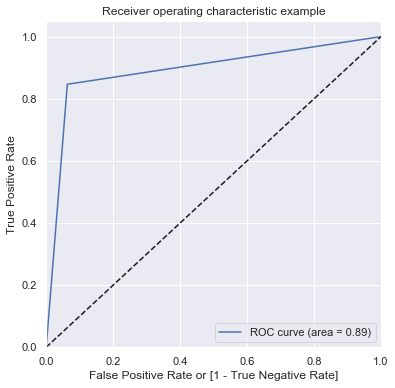

(array([0.        , 0.06318471, 1.        ]),
 array([0.        , 0.84669133, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [111]:
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

In [112]:
#draw_roc(y_pred_final.Converted, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Conv_Prob))

'0.96'

In [113]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
print(confusion)

[[3677  248]
 [ 373 2060]]


#### Optimal Cutoff

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,LeadID,Converted,Conv_Prob,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,8291,0,0.002073,0,0,1,0,0,0,0,0,0,0,0,0
1,4908,0,0.107174,0,11,1,1,0,0,0,0,0,0,0,0
2,4195,1,0.708767,1,71,1,1,1,1,1,1,1,1,0,0
3,42,0,0.001869,0,0,1,0,0,0,0,0,0,0,0,0
4,251,0,0.061860,0,6,1,0,0,0,0,0,0,0,0,0


In [115]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.382668  1.000000     0.000000   
0.1  0.1          0.749764  0.965064     0.616306   
0.2  0.2          0.851997  0.942047     0.796178   
0.3  0.3          0.900755  0.896424     0.903439   
0.4  0.4          0.904530  0.871763     0.924841   
0.5  0.5          0.902328  0.846691     0.936815   
0.6  0.6          0.898553  0.815043     0.950318   
0.7  0.7          0.894306  0.771887     0.970191   
0.8  0.8          0.866153  0.675298     0.984459   
0.9  0.9          0.839729  0.593506     0.992357   


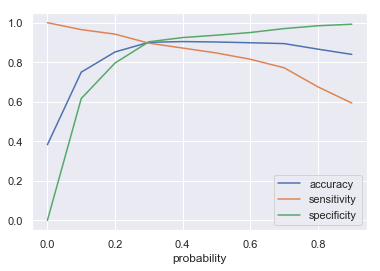

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [117]:
#  0.3 is the optimum point to take it as a cutoff probability tp predict the final probability

y_pred_final['final_pred'] = y_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.head(10)

,LeadID,Converted,Conv_Prob,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,8291,0,0.002073,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4908,0,0.107174,0,11,1,1,0,0,0,0,0,0,0,0,0
2,4195,1,0.708767,1,71,1,1,1,1,1,1,1,1,0,0,1
3,42,0,0.001869,0,0,1,0,0,0,0,0,0,0,0,0,0
4,251,0,0.061860,0,6,1,0,0,0,0,0,0,0,0,0,0
5,7368,0,0.107174,0,11,1,1,0,0,0,0,0,0,0,0,0
6,7974,0,0.018421,0,2,1,0,0,0,0,0,0,0,0,0,0
7,2337,1,0.969689,1,97,1,1,1,1,1,1,1,1,1,1,1
8,7011,0,0.249779,0,25,1,1,1,0,0,0,0,0,0,0,0
9,8694,0,0.037340,0,4,1,0,0,0,0,0,0,0,0,0,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_pred)

cm2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_pred )
cm2
TP = cm2[1,1] 
TN = cm2[0,0] 
FP = cm2[0,1] 
FN = cm2[1,0] 
print("SENSITIVITY of the logistic regression model is  ",TP / float(TP+FN))


SENSITIVITY of the logistic regression model is   0.8964241676942046


In [119]:
print("True negatives are ",TN / float(TN+FP))
print("False Positives are  ",FP/ float(TN+FP))
print ("True Positives are  ",TP / float(TP+FP))
print (TN / float(TN+ FN))

True negatives are  0.9034394904458599
False Positives are   0.09656050955414013
True Positives are   0.851953125
0.933649289099526


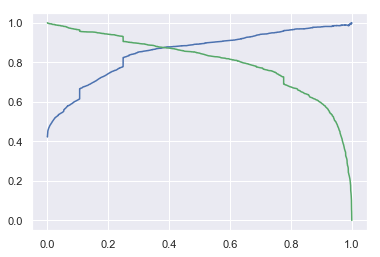

In [120]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conv_Prob)
plt.plot(thresholds, precision[:-1], "b")
plt.plot(thresholds, recall[:-1], "g")
plt.show()

### 0.38 is the tradeoff between Precision and Recall - 
thus we can safely choose to consider any Prospect Lead with Conversion Probability higher than 38 % to be a hot Lead

### Making Predictions on test set X_test

In [121]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website']])


In [122]:
X_test=X_test[vars]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Profile_Other Leads,Lead Profile_Potential Lead,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
1786,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1
2469,0.206897,0.185307,0,0,0,0,0,0,1,0,0,0,0,1,0
4177,0.206897,0.004212,0,0,0,0,0,0,0,0,0,0,0,0,1
3912,0.068966,0.340197,0,0,0,0,0,0,1,0,0,0,0,0,1
5138,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1


In [123]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

1786    0.776454
2469    0.066023
4177    0.013659
3912    0.879599
5138    0.776454
dtype: float64

In [124]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conv_Prob'], axis=1)
y_pred_final.head()


,LeadID,Converted,Conv_Prob
0,1786,1,0.776454
1,2469,0,0.066023
2,4177,0,0.013659
3,3912,1,0.879599
4,5138,0,0.776454


In [125]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Conv_Prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,LeadID,Converted,Conv_Prob,Lead_Score
0,1786,1,0.776454,78
1,2469,0,0.066023,7
2,4177,0,0.013659,1
3,3912,1,0.879599,88
4,5138,0,0.776454,78


### Taking 0.38 as the cutoff using precision recall tradeoff

In [126]:

y_pred_final['final_pred'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head(10)

,LeadID,Converted,Conv_Prob,Lead_Score,final_pred
0,1786,1,0.776454,78,1
1,2469,0,0.066023,7,0
2,4177,0,0.013659,1,0
3,3912,1,0.879599,88,1
4,5138,0,0.776454,78,1
5,7202,1,0.998769,100,1
6,6678,0,0.025713,3,0
7,284,0,0.590213,59,1
8,2741,0,0.107175,11,0
9,6790,0,0.005487,1,0


### Evaluation of model on test data

In [127]:
print("Model Accuracy on Test data is ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_pred))

Model Accuracy on Test data is  0.9005869405722671


In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_pred )
confusion2
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

print("Sensitivity of the model on test data is ",round(TP / float(TP+FN),2))

Sensitivity of the model on test data is  0.88


In [129]:
print("Specificity of the model on test data is ",TN / float(TN+FP))

Specificity of the model on test data is  0.9106407995296885


## Visualising the conversion rate of the most Impactful Features of Leads Data

In [130]:
ydf=y_train_df.set_index("LeadID")

In [131]:
Xy_Traindf=pd.concat([ydf,X_train_sm.iloc[:,1:]],axis=1)

In [132]:
Xy_Traindf.corr()["Converted"].sort_values()

Last Notable Activity_Modified                  -0.265032
Do Not Email_Yes                                -0.136645
Lead Source_Olark Chat                          -0.118216
Lead Quality_Not Sure                           -0.112952
Last Notable Activity_Olark Chat Conversation   -0.074201
Lead Profile_Other Leads                         0.000491
TotalVisits                                      0.046482
Lead Source_Welingak Website                     0.151095
Tags_Lost to EINS                                0.172937
Tags_Closed by Horizzon                          0.233456
Lead Origin_Lead Add Form                        0.306686
Total Time Spent on Website                      0.341584
Tags_Will revert after reading the email         0.357042
Last Notable Activity_SMS Sent                   0.359584
Lead Profile_Potential Lead                      0.372867
Converted                                        1.000000
Name: Converted, dtype: float64

#### Analysing the training data over the Encoded variables which are finally selected ny the logistic regression model

In [133]:
Xy_Traindf.reset_index(inplace=True)

In [134]:
Xy_Traindf=Xy_Traindf.rename(columns={"index":"LeadID"})

In [135]:
@interact
def counts(col =['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Quality_Not Sure',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent']):
    sns.countplot(x=col,data=Xy_Traindf,hue="Converted",palette="husl")
    plt.xlabel(col)
    plt.ylabel('Total count')
    plt.legend(loc='upper center', bbox_to_anchor=(1, 0.8), ncol=1)
    plt.xticks(rotation=65, horizontalalignment='right',fontweight='light')
    convertcount=Xy_Traindf.pivot_table(values='LeadID',index=col,columns='Converted', aggfunc='count').fillna(0)
    convertcount["Conversion(%)"] =round(convertcount[1]/(convertcount[0]+convertcount[1]),2)*100
    return print(convertcount.sort_values(ascending=False,by=1),plt.show())

interactive(children=(Dropdown(description='col', options=('Lead Origin_Lead Add Form', 'Lead Source_Olark Cha…

###  The above Visualisation shows that the variables chosen by out logistic regression model are appropriate and make the most impact in conversion rates of the leads to Hot leads